Univariate & Bivariate Analysis



In [1]:
import pandas as pd
df = pd.read_csv("/Indian_Kids_Screen_Time_100.csv")
df.head(9)


,Child_ID,Age,Gender,Weekday_ScreenTime_Hours,Weekend_ScreenTime_Hours,Device_Most_Used,Parental_Control,Outdoor_Activity_Hours
0,1,7,Male,2.2,4.0,Laptop,Yes,1.7
1,2,6,Female,2.0,5.6,TV,No,1.3
2,3,10,Female,3.6,5.4,Tablet,Yes,1.7
3,4,9,Female,1.7,2.4,Tablet,No,1.4
4,5,9,Female,1.6,3.7,Laptop,No,1.1
5,6,8,Male,2.3,3.1,Laptop,No,1.2
6,7,7,Male,2.3,2.0,Tablet,Yes,2.0
7,8,14,Female,1.8,5.1,TV,No,2.7
8,9,7,Male,1.7,4.5,Laptop,No,1.9


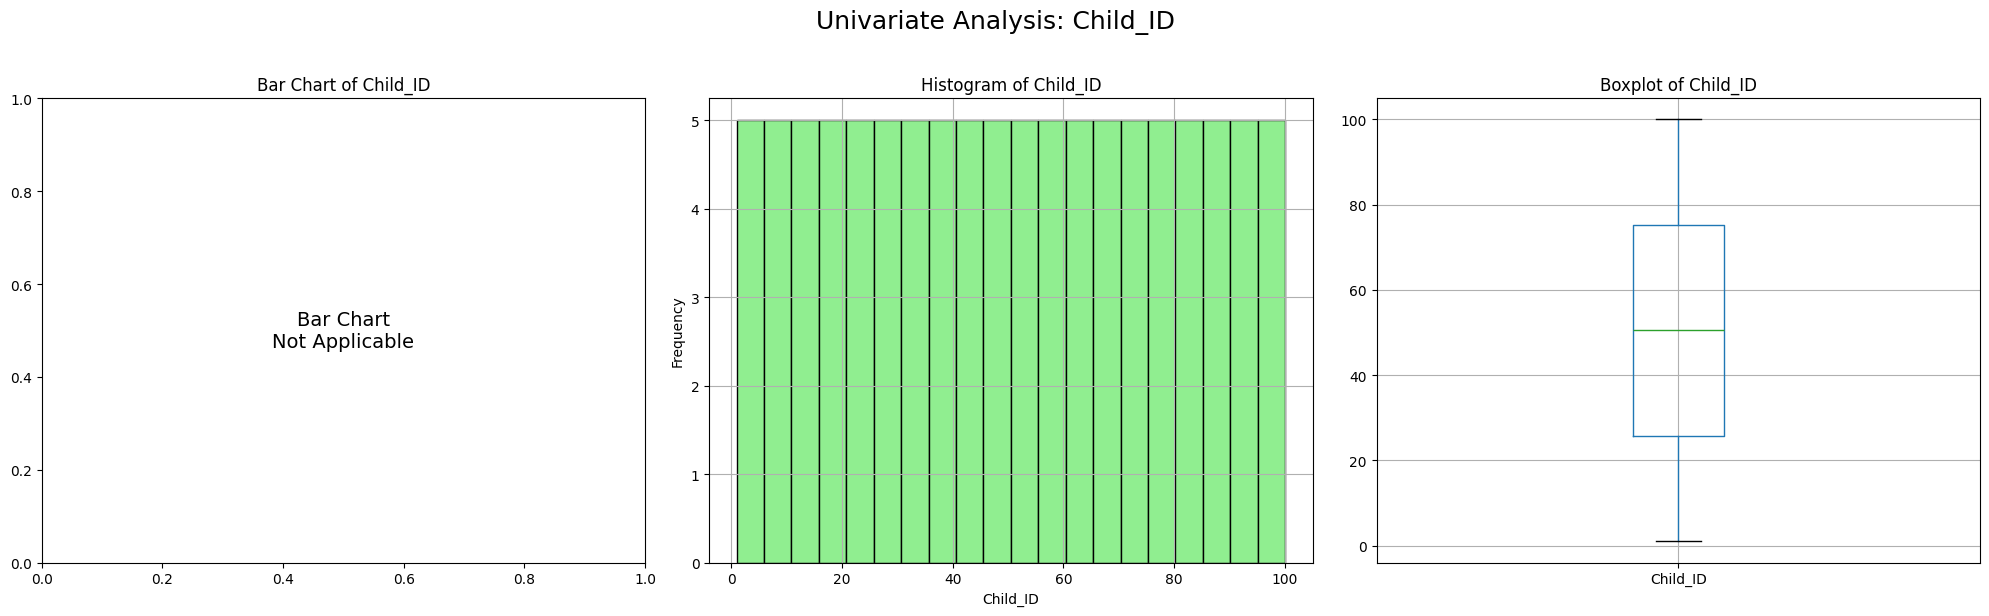

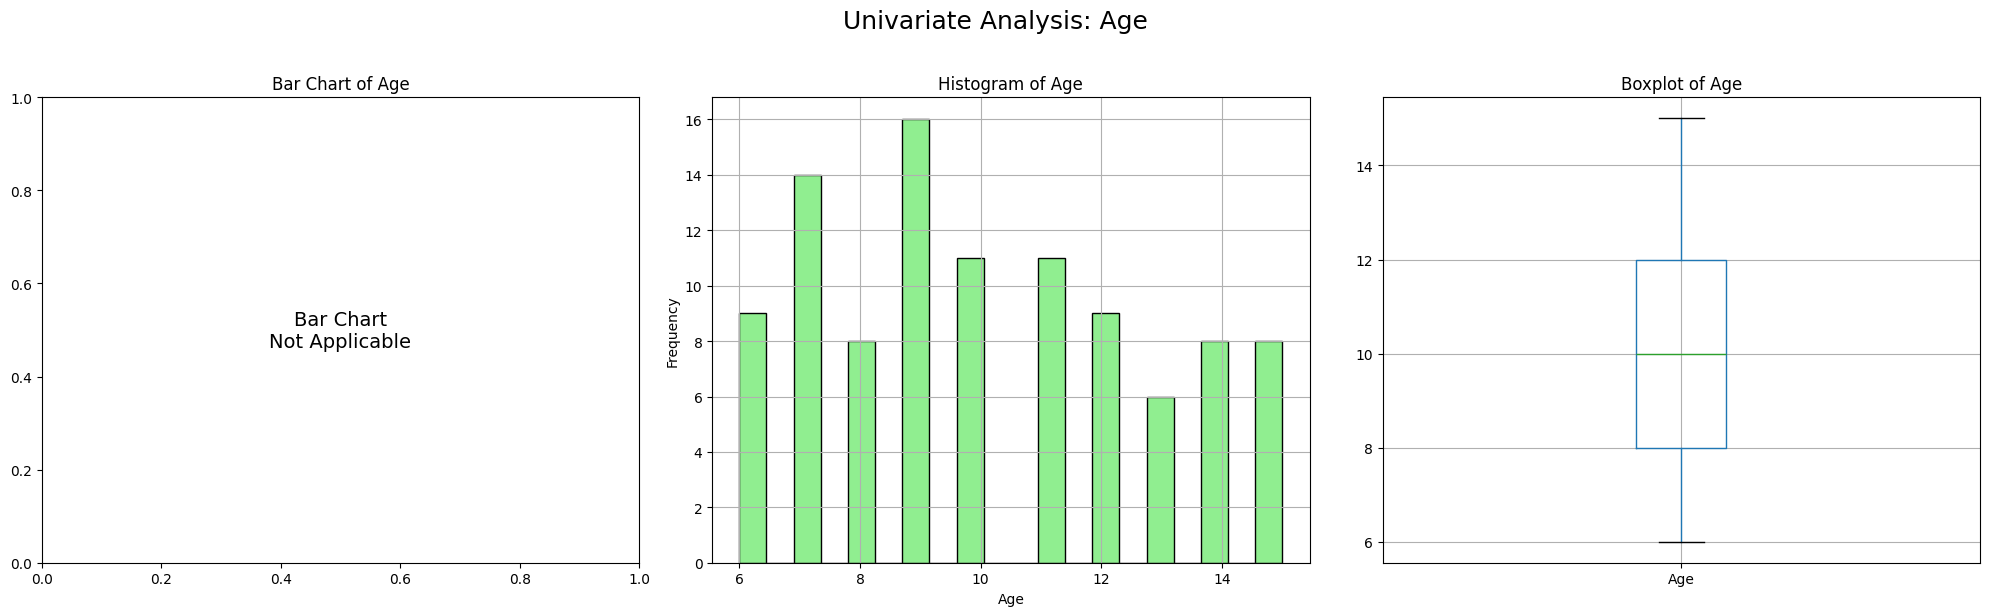

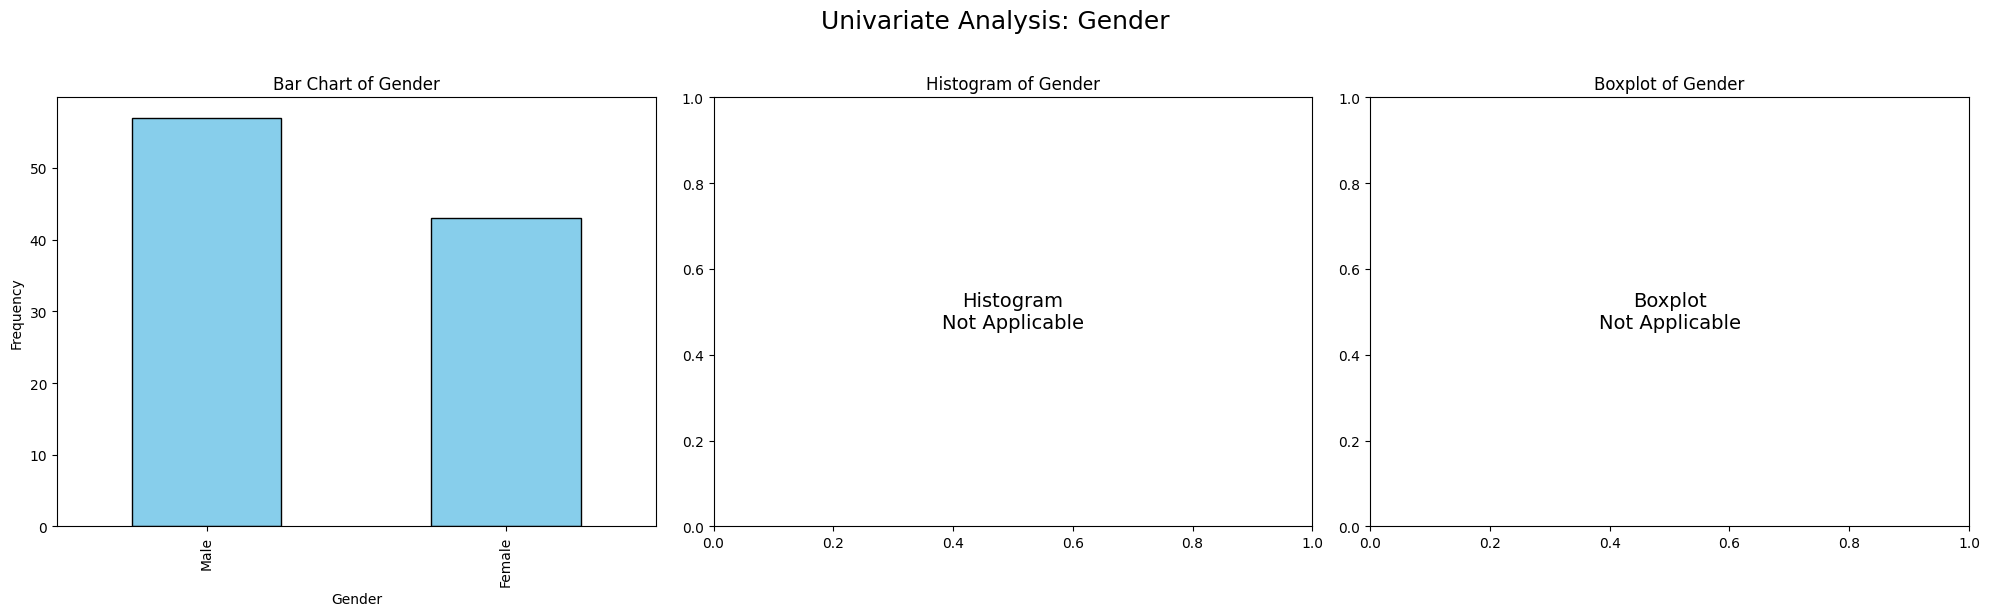

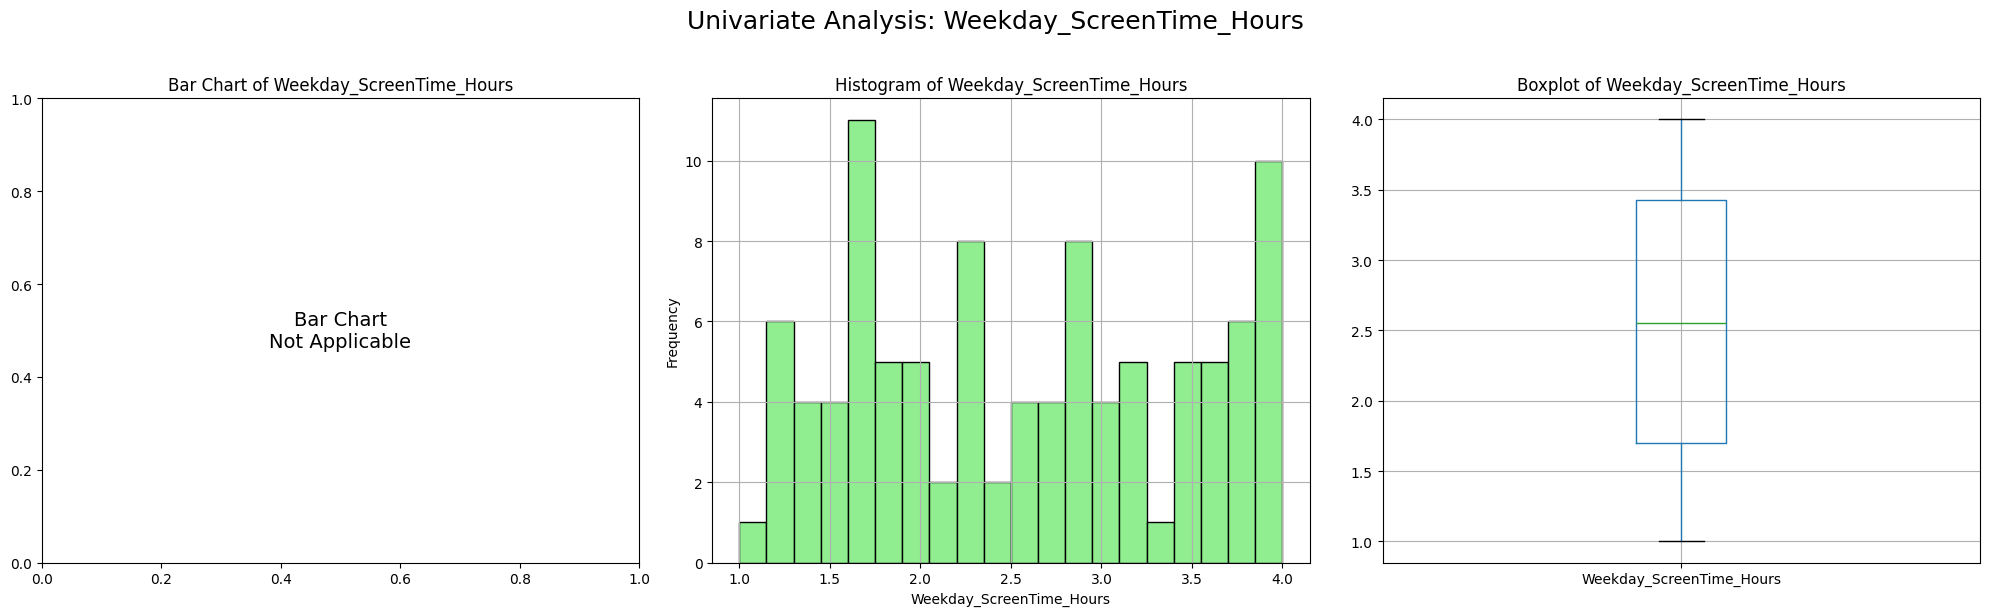

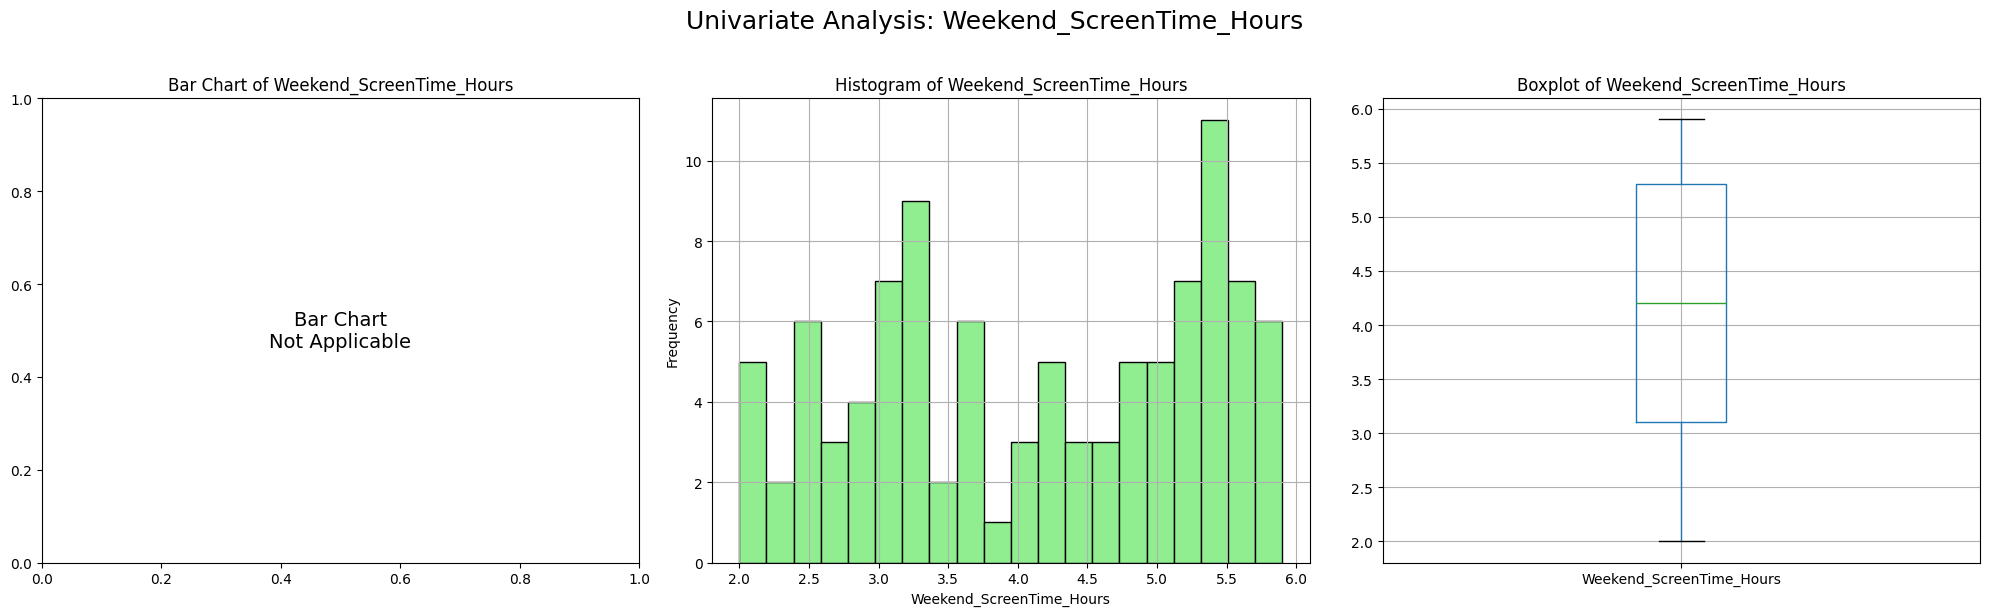

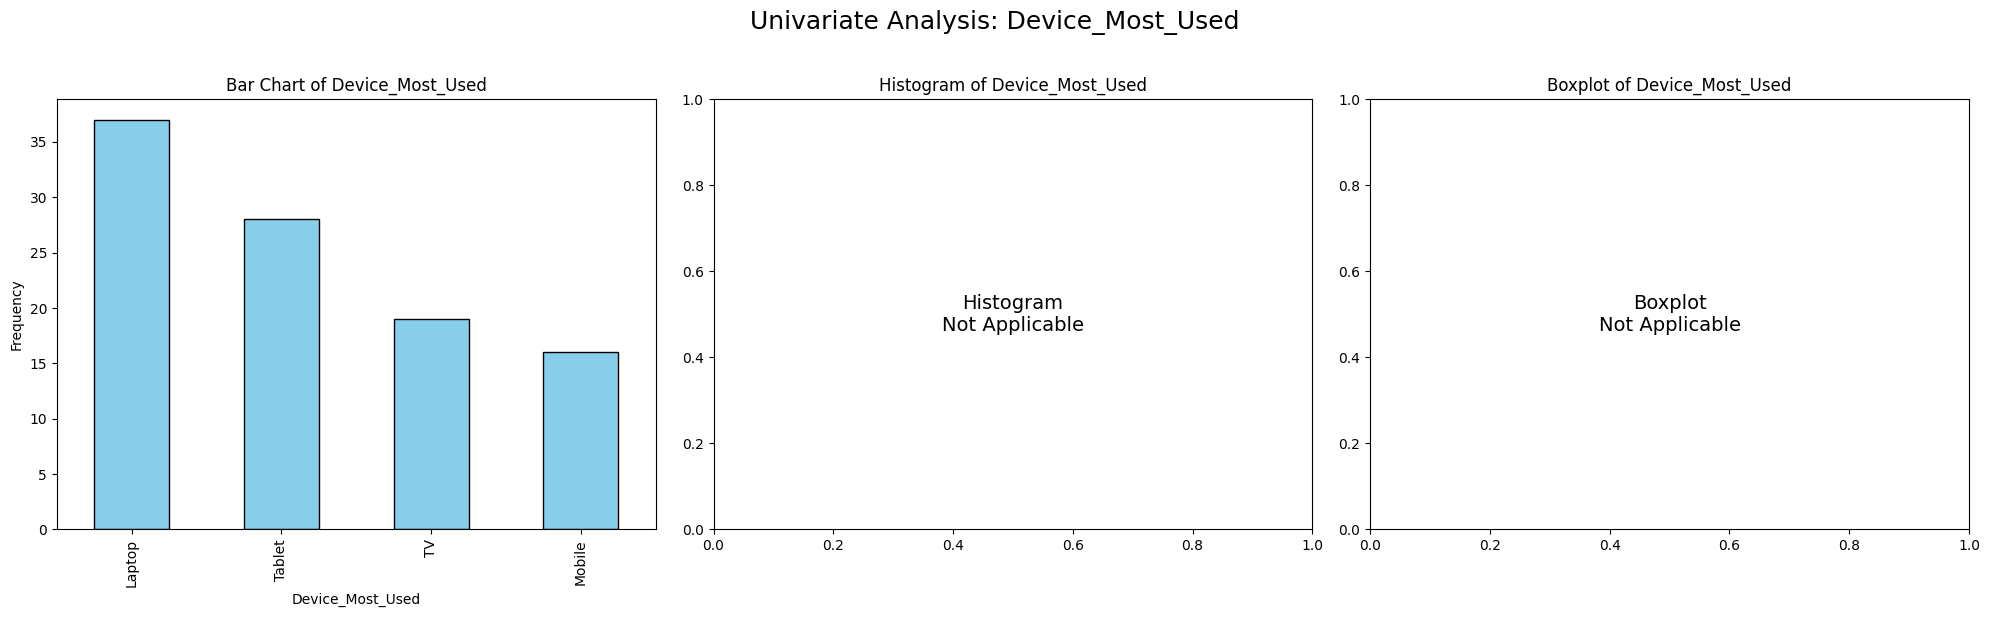

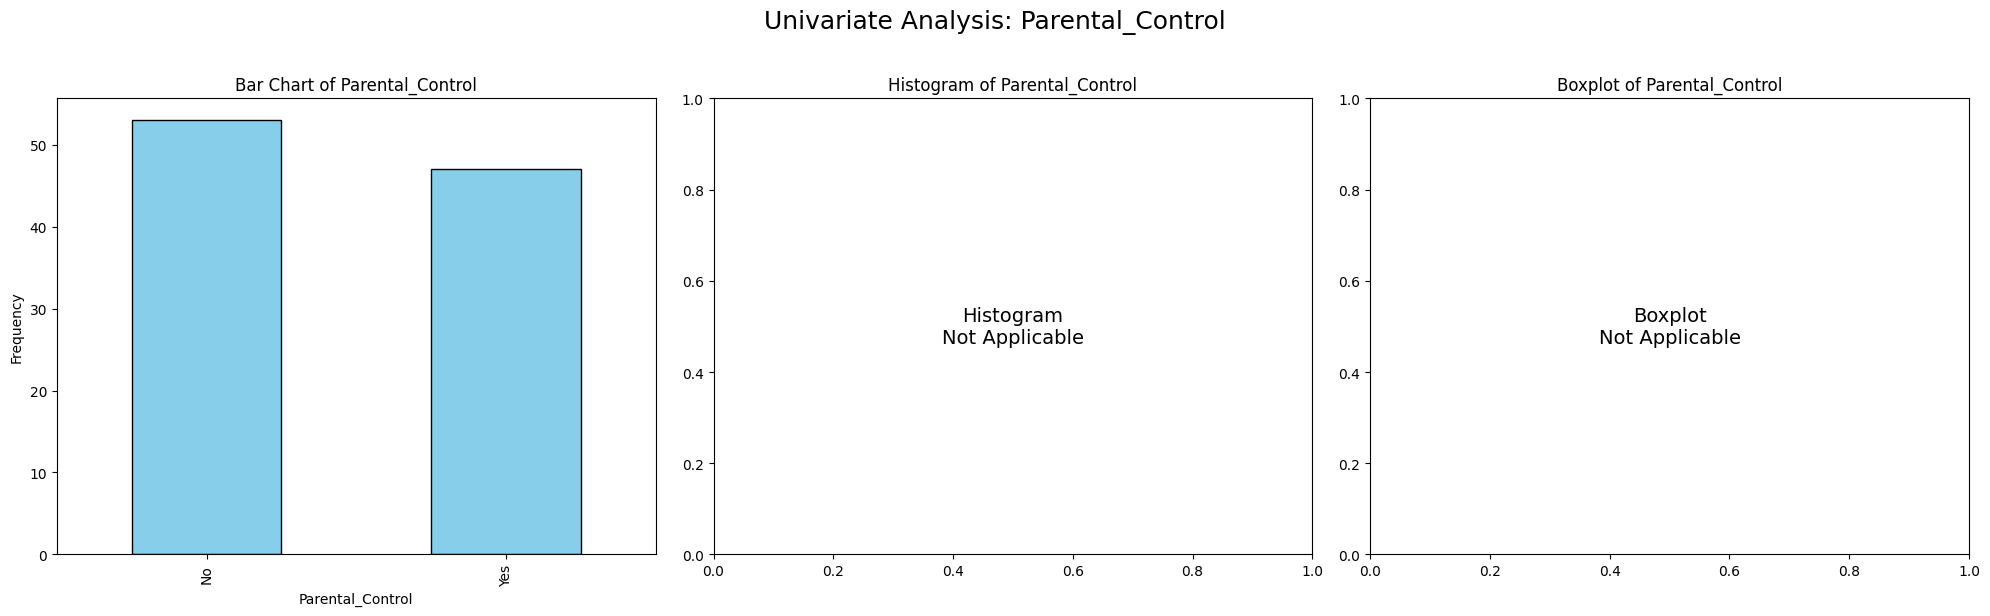

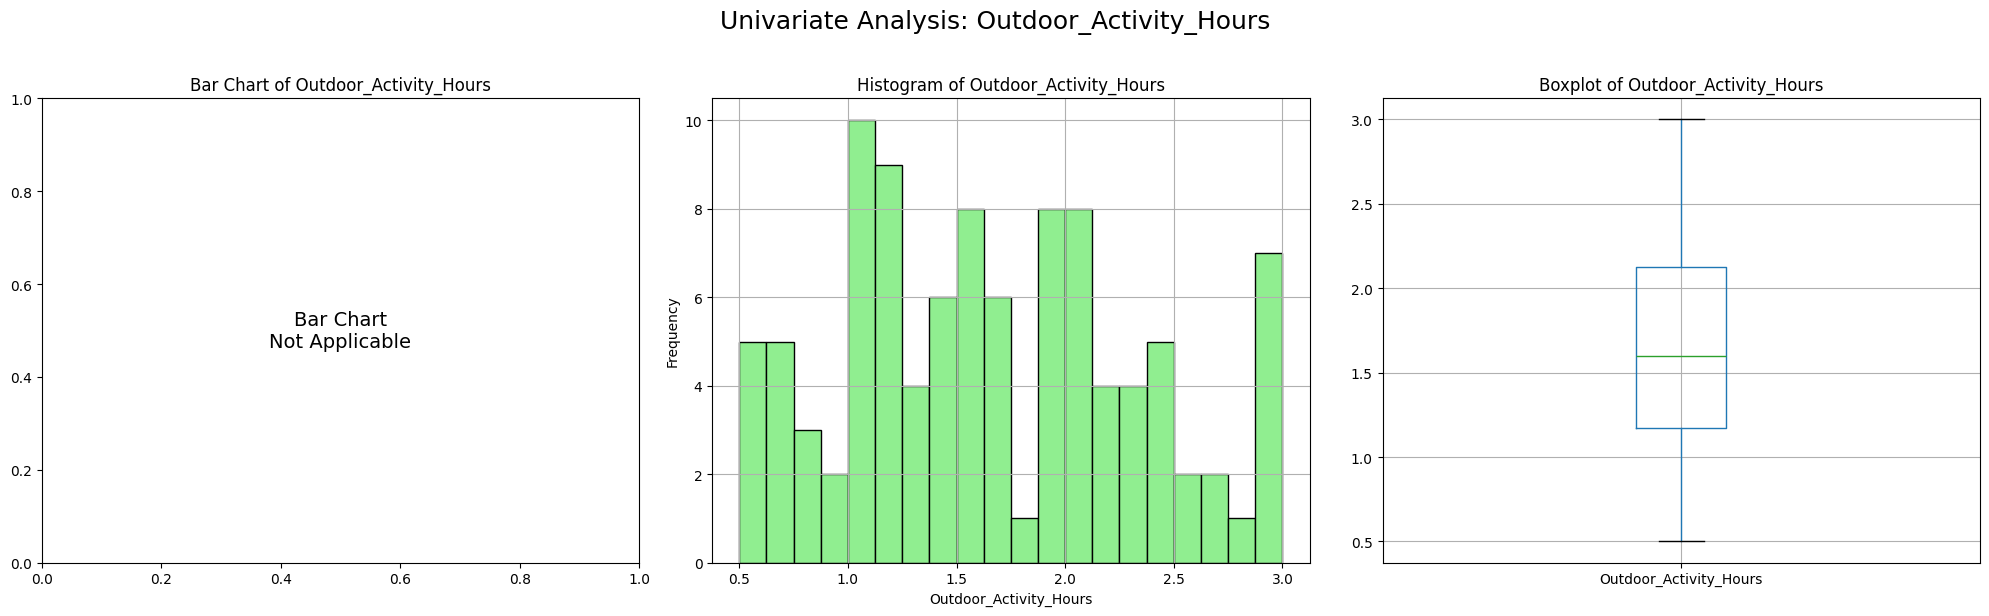

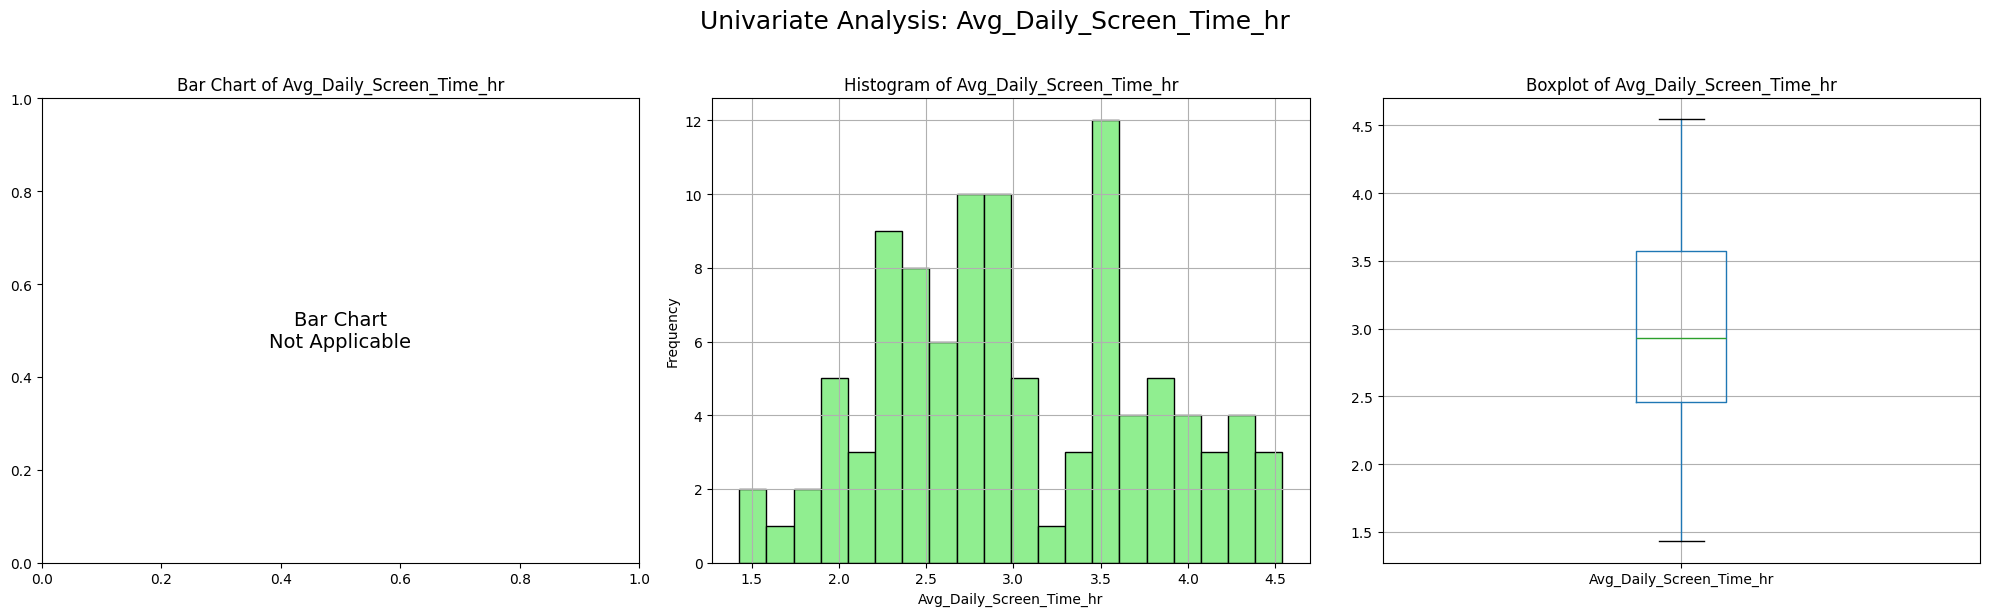

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset (already loaded as df)
# Create Avg Daily Screen Time column for richer analysis
df["Avg_Daily_Screen_Time_hr"] = (df["Weekday_ScreenTime_Hours"] * 5 + df["Weekend_ScreenTime_Hours"] * 2) / 7

# Main univariate analysis loop
for column in df.columns:
    plt.figure(figsize=(20, 6))

    # Bar Chart (for categorical/boolean columns)
    plt.subplot(1, 3, 1)
    if df[column].dtype == 'object' or df[column].dtype.name == 'category' or df[column].dtype == bool:
        df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Bar Chart\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=14)
        plt.title(f'Bar Chart of {column}')

    # Histogram (numeric only)
    plt.subplot(1, 3, 2)
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].hist(bins=20, edgecolor='black', color='lightgreen')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Histogram\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=14)
        plt.title(f'Histogram of {column}')

    # Boxplot (numeric only)
    plt.subplot(1, 3, 3)
    if pd.api.types.is_numeric_dtype(df[column]):
        df.boxplot(column=column)
        plt.title(f'Boxplot of {column}')
    else:
        plt.text(0.5, 0.5, 'Boxplot\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=14)
        plt.title(f'Boxplot of {column}')

    plt.suptitle(f'Univariate Analysis: {column}', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()


Plotting bivariate analysis for Gender


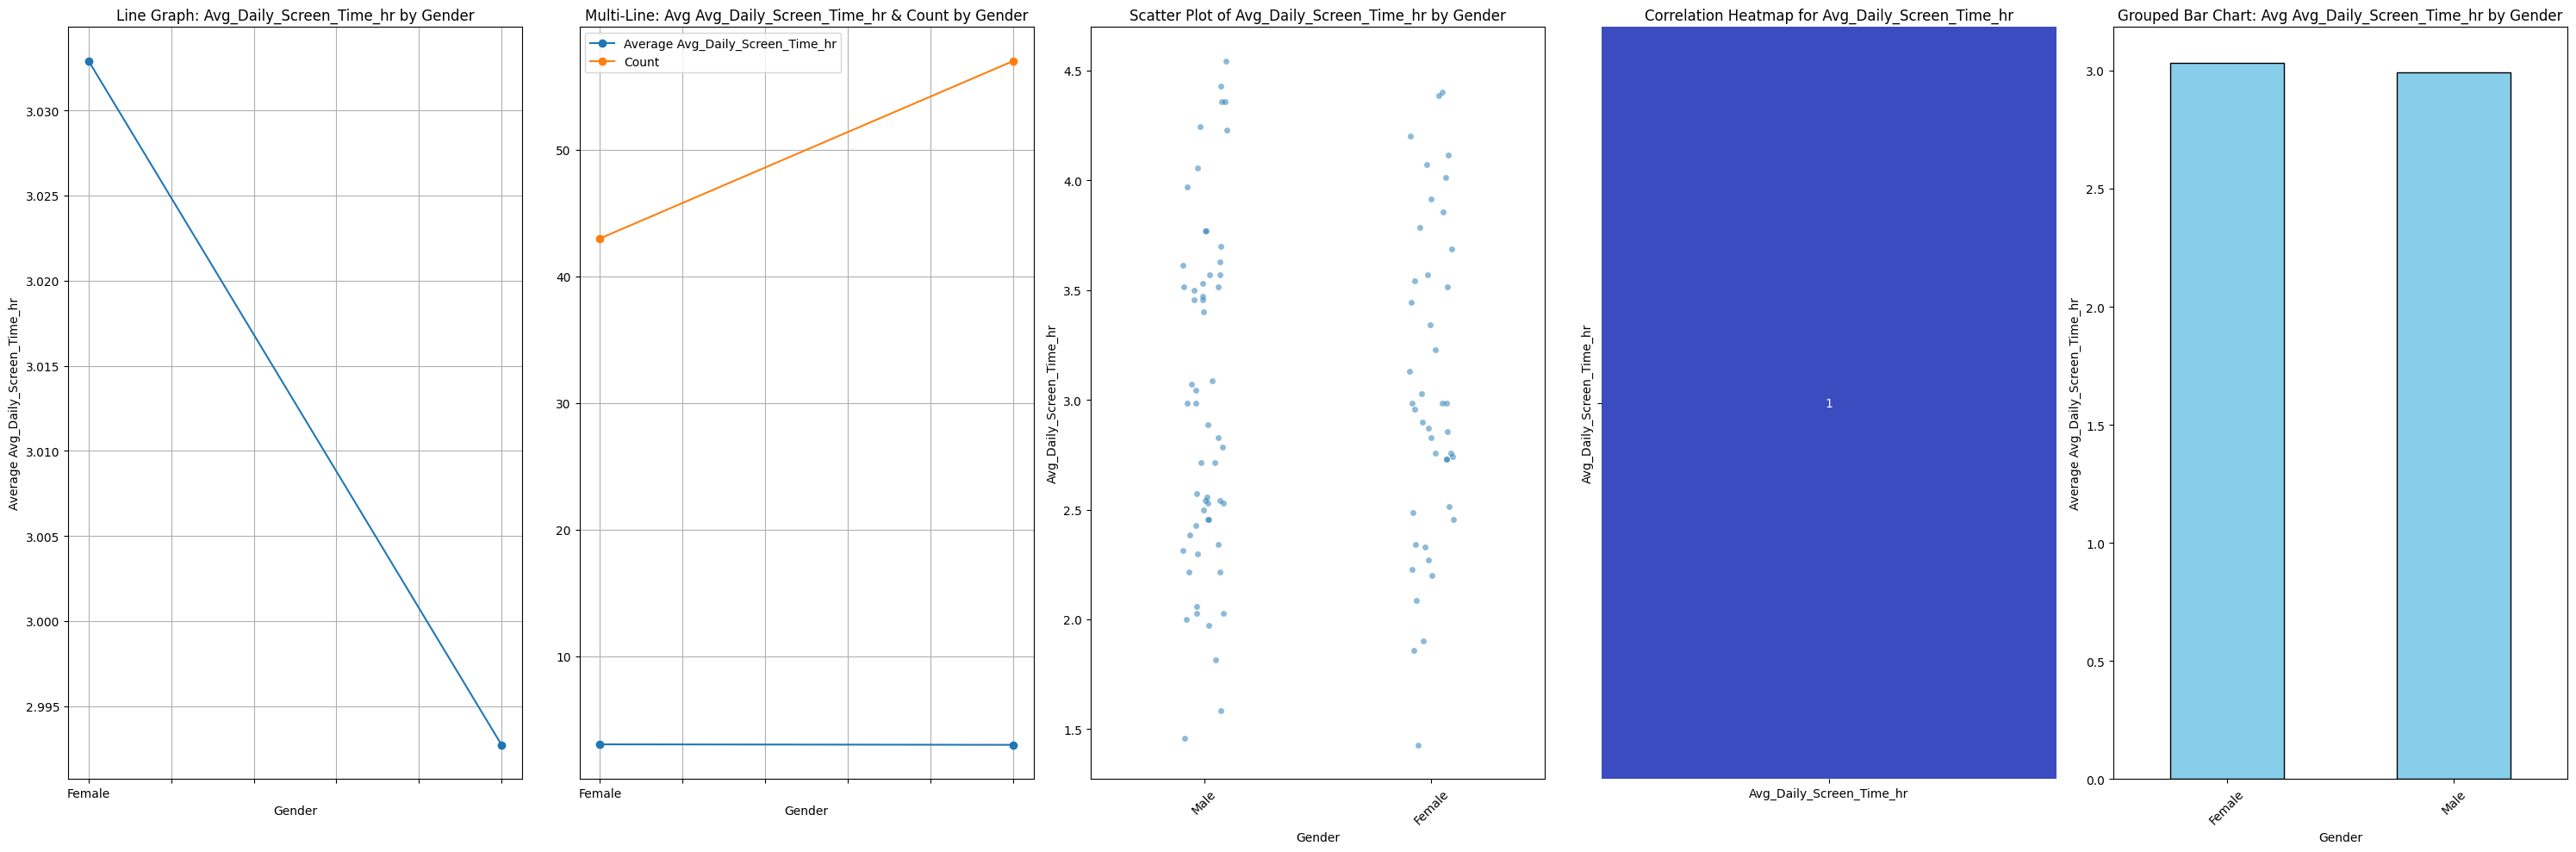

Plotting bivariate analysis for Device_Most_Used


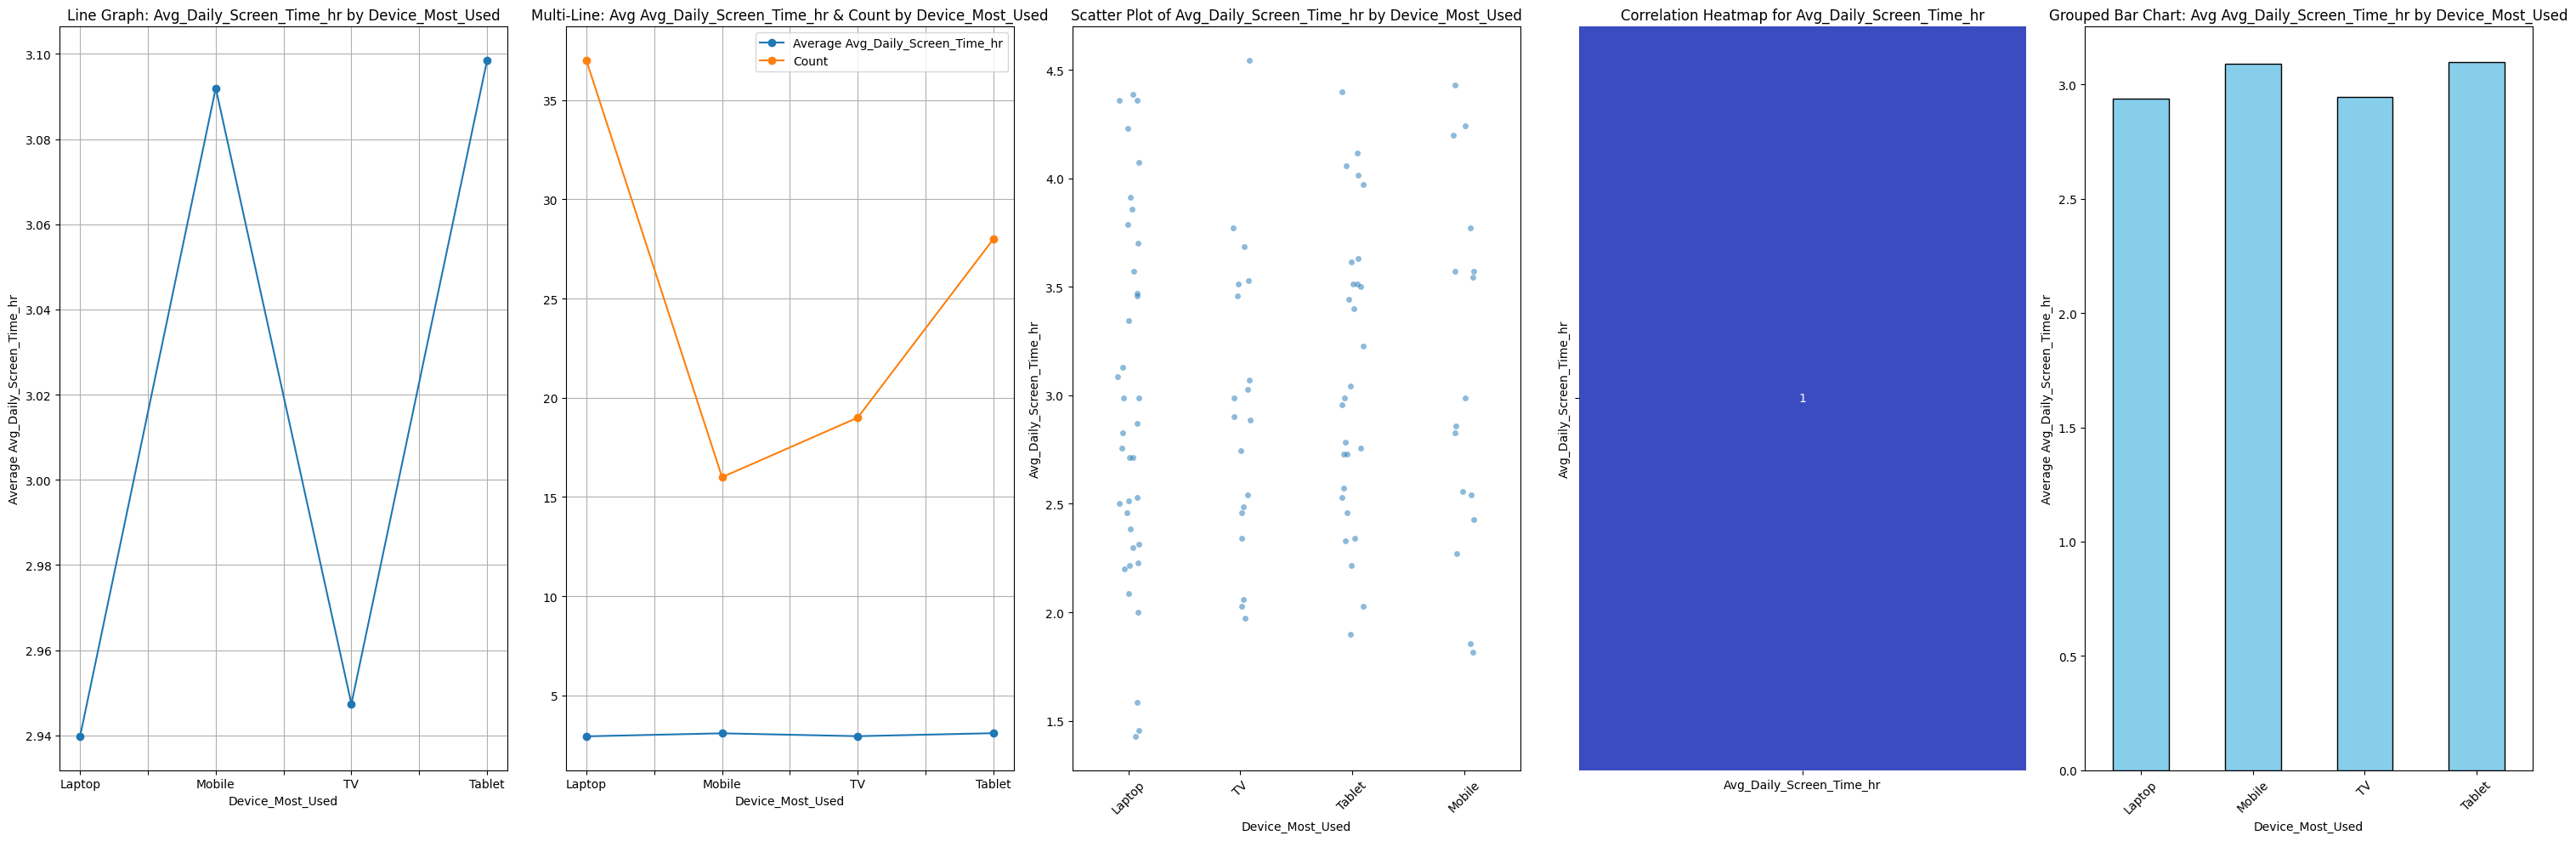

Plotting bivariate analysis for Parental_Control


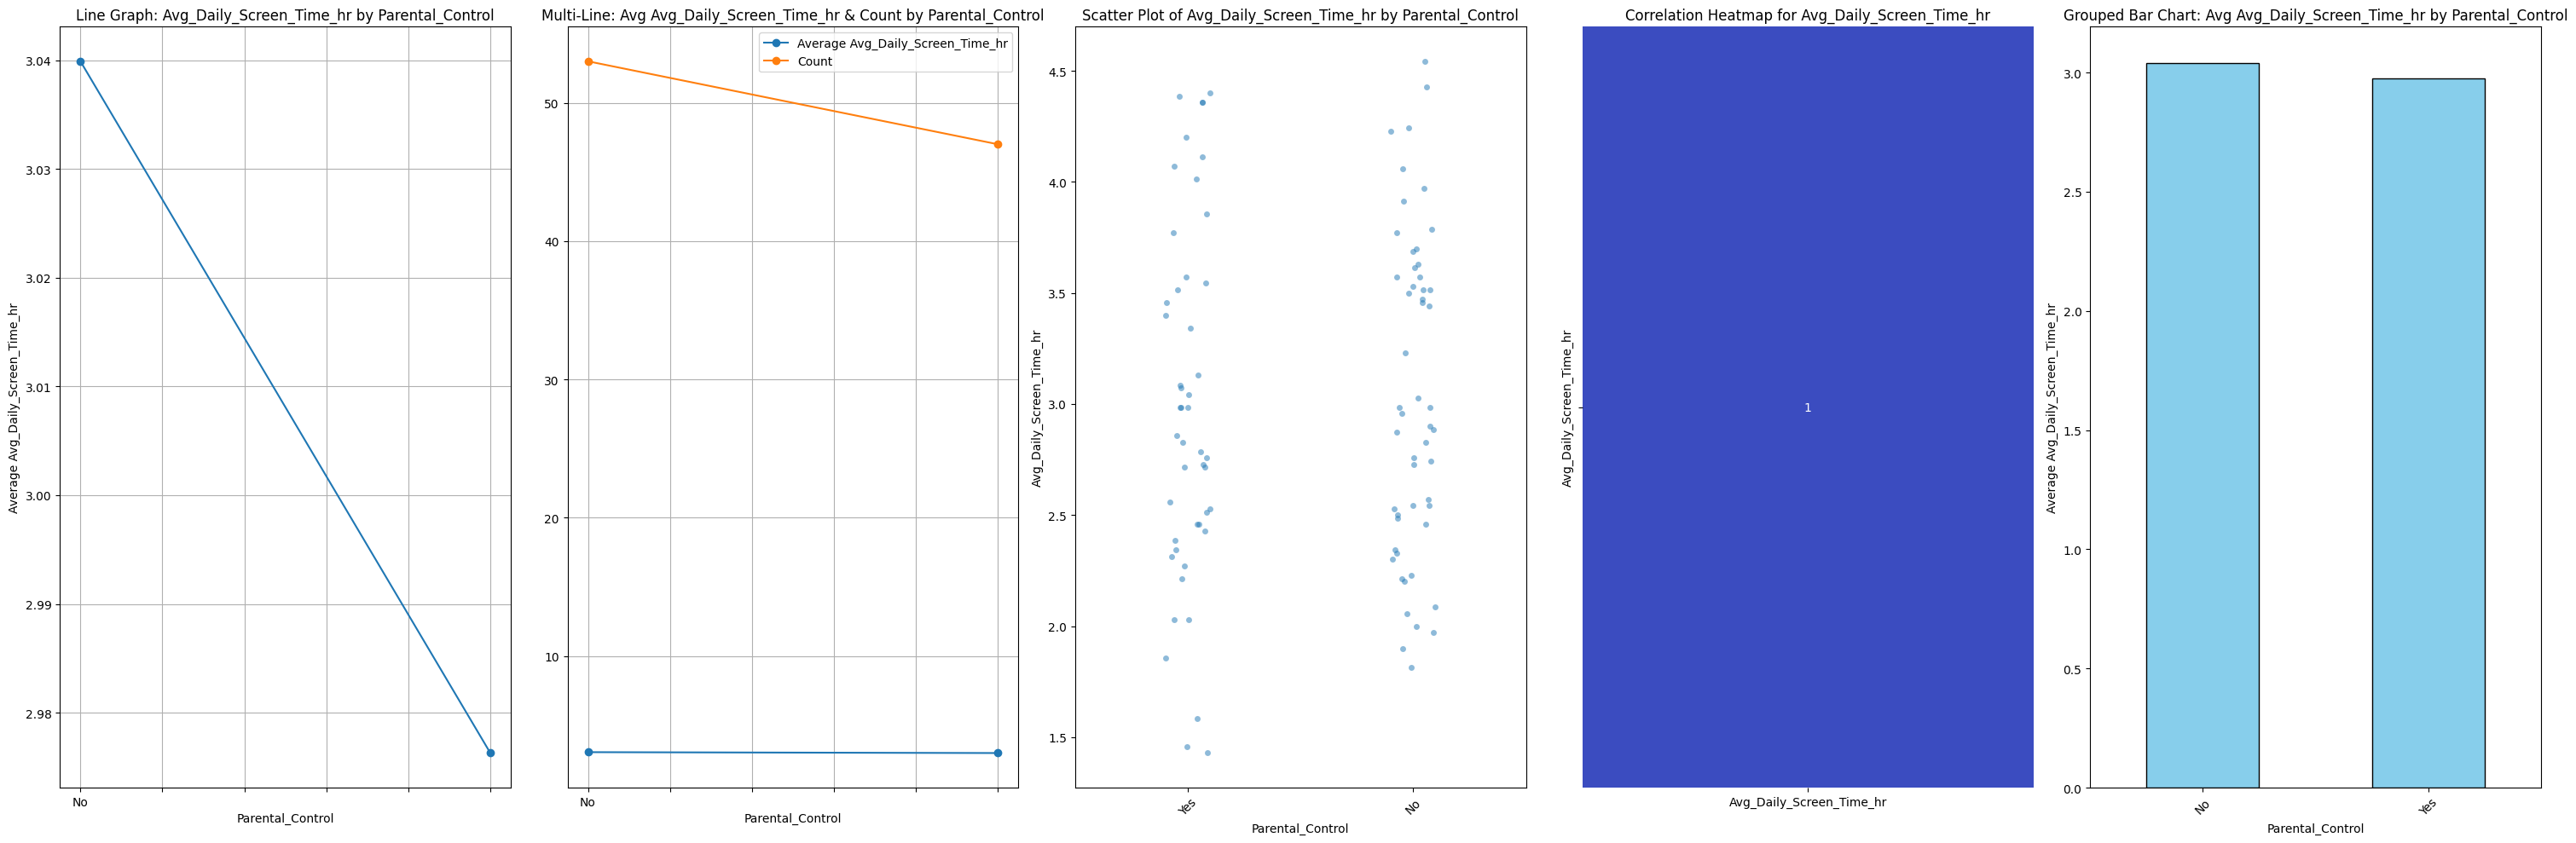

In [4]:
# Create Avg Daily Screen Time column
df["Avg_Daily_Screen_Time_hr"] = (df["Weekday_ScreenTime_Hours"] * 5 + df["Weekend_ScreenTime_Hours"] * 2) / 7

# Updated categorical variables available in dataset
bivariate_vars = ["Gender", "Device_Most_Used", "Parental_Control"]

# Numeric variable
numeric_var = "Avg_Daily_Screen_Time_hr"

# Now run your plotting function
plot_bivariate_analysis(df, bivariate_vars, numeric_var)


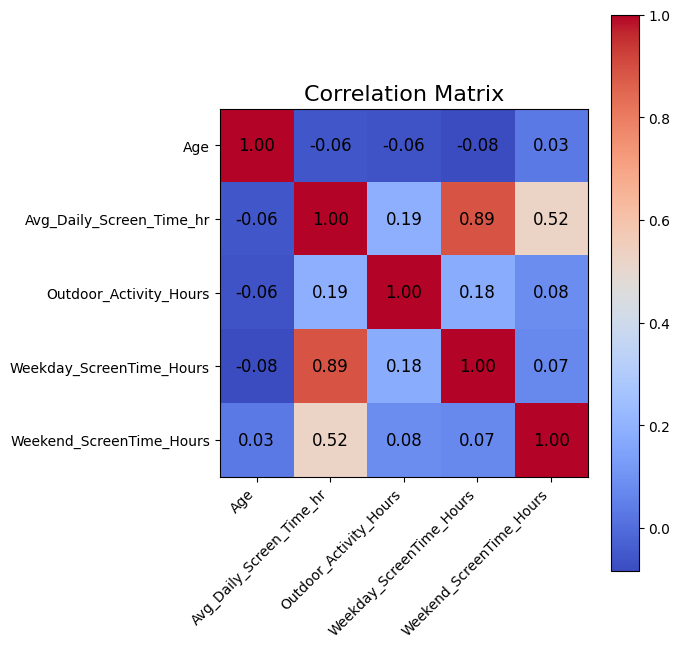

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns that make sense
corr = df[['Age', 'Avg_Daily_Screen_Time_hr', 'Outdoor_Activity_Hours',
           'Weekday_ScreenTime_Hours', 'Weekend_ScreenTime_Hours']].corr()

plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix", fontsize=16)

# Add correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


   SUMMARY

1. Bivariate Analysis (Numeric vs Categorical)

   Creates average daily screen time column from weekday & weekend hours.

   Compares this numeric value against categorical variables like Gender, Device_Most_Used, Parental_Control.

   Produces 5 plots per variable:

   Line graph of averages

   Multi-line (avg + count)

   Scatter plot of individual points

   Heatmap (dummy, only for numeric correlation)

   Grouped bar chart

2. Univariate Analysis (All Columns)

    Loops through every column in the dataset.

    For categorical/boolean columns → Bar Chart (frequency).

    For numeric columns → Histogram (distribution) + Boxplot (spread/outliers).

    Skips plots not suitable (e.g., Child_ID).

    Includes the derived Avg_Daily_Screen_Time_hr.

3. Correlation Heatmap (Numeric Variables)

    Selects numeric columns: Age, Weekday_ScreenTime_Hours, Weekend_ScreenTime_Hours, Outdoor_Activity_Hours, Avg_Daily_Screen_Time_hr.

    Computes their correlation matrix.

    Displays it as a heatmap with numbers inside each cell.

    Helps identify relationships (e.g., more weekday screen time → higher average daily screen time).